In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('Current_Combine.csv')
df.head()

,I_mean,I_max,I_min,I_rms,I_std_dev,I_skewness,I_crest_factor,I_form_factor,fault_type
0,8.096805,8.27147,8.01802,8.097058,0.065110,0.839110,1.021540,1.000031,0
1,8.046263,8.15627,7.92586,8.046435,0.053445,-0.652841,1.013650,1.000021,0
2,7.994980,8.08714,7.92586,7.995094,0.043309,0.547225,1.011513,1.000014,0
3,7.971940,8.06410,7.85674,7.972067,0.045694,-0.328877,1.011544,1.000016,0
4,7.959305,8.06410,7.87978,7.959389,0.037074,0.426795,1.013156,1.000010,0


In [9]:
df.shape

(30000, 9)

In [10]:
df.describe()

,I_mean,I_max,I_min,I_rms,I_std_dev,I_skewness,I_crest_factor,I_form_factor,fault_type
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,6.352343,6.401701,6.307495,6.352470,0.027187,0.144203,1.007702,1.000020,14.500000
std,0.341513,0.357521,0.341249,0.341579,0.032104,0.582888,0.009549,0.000936,8.655586
min,5.403435,5.979000,0.000000,5.794581,0.007603,-3.139651,1.000588,1.000001,0.000000
25%,6.167145,6.204000,6.117000,6.167195,0.021820,-0.231429,1.005629,1.000006,7.000000
50%,6.256211,6.307000,6.221000,6.256265,0.025247,0.134498,1.007124,1.000008,14.500000
75%,6.410151,6.463000,6.359000,6.410271,0.029415,0.503802,1.008931,1.000010,22.000000
max,8.098292,14.343000,8.018020,8.098551,3.477615,2.936954,1.928221,1.122050,29.000000


In [11]:
df.isnull().sum()

I_mean            0
I_max             0
I_min             0
I_rms             0
I_std_dev         0
I_skewness        0
I_crest_factor    0
I_form_factor     0
fault_type        0
dtype: int64

In [12]:
df.isnull().sum().sum()

np.int64(0)

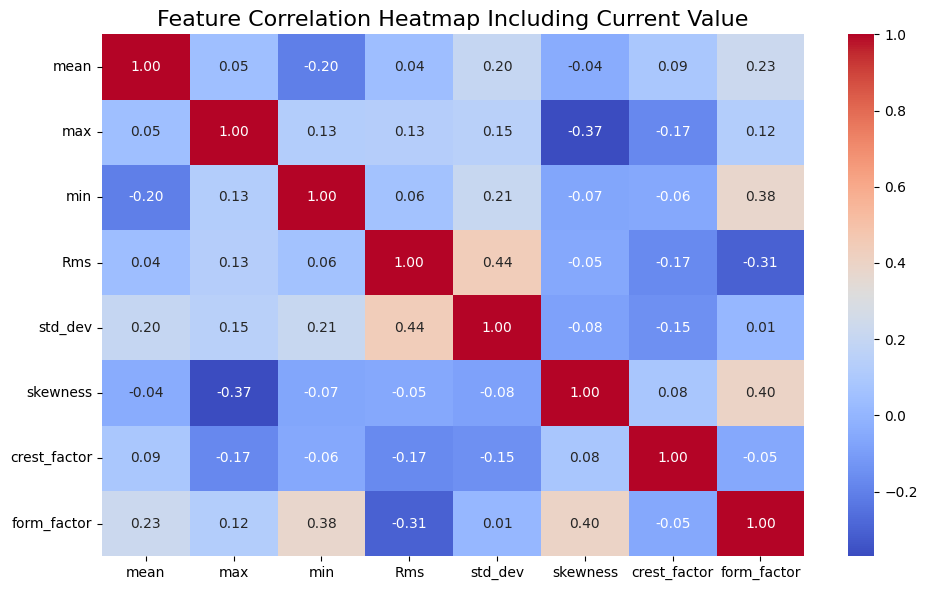

In [13]:
np.random.seed(42)
data = np.random.rand(20, 8) * 10  # 20 rows, 7 columns of sensor readings
columns =  ['mean', 'max', 'min', 'Rms','std_dev', 'skewness','crest_factor', 'form_factor']
df = pd.DataFrame(data, columns=columns)

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)

# Customizing the heatmap
plt.title("Feature Correlation Heatmap Including Current Value", fontsize=16)
# plt.xlabel("Features", fontsize=12)
# plt.ylabel("Features", fontsize=12)
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.tight_layout()

# Display the heatmap
plt.show()


Model Preparation Using Support Vector Machine

In [14]:
 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC

In [15]:
y = df['fault_type']  # Assign the 'fault_type' column to y
x = df.iloc[:, :-1]   # Exclude the last column and assign the remaining DataFrame to x

KeyError: 'fault_type'

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42)

NameError: name 'x' is not defined

In [15]:
models_list = [SVC()]

model_hyperparameters = {
    'svc_hyperparameters': {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'C': [1, 5, 10, 20],
         
    }
}

In [16]:
def ModelSelection(list_of_models, hyperparameters_dictionary):

  result = []

  i = 0

  for model in list_of_models:

    key = model_keys[i]

    params = hyperparameters_dictionary[key]

    i += 1

    print(model)
    print(params)
    print('---------------------------------')

    classifier = GridSearchCV(model, params, cv=5)

    # fitting the data to classifier
    # x_scaled = scaler.fit_transform(x)
    classifier.fit(X_train,y_train)

    result.append({
        'model used' : model,
        'highest score' : classifier.best_score_,
        'best hyperparameters' : classifier.best_params_
    })

  result_dataframe = pd.DataFrame(result, columns = ['model used','highest score','best hyperparameters'])

  return result_dataframe

In [17]:
model_keys = list(model_hyperparameters.keys())
print(model_keys)

['svc_hyperparameters']


In [18]:
results = ModelSelection(models_list, model_hyperparameters )
print(results)

SVC()
{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}
---------------------------------
  model used  highest score           best hyperparameters
0      SVC()       0.340167  {'C': 20, 'kernel': 'linear'}


Model Selection Using K nearest Neighbour

In [21]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42)

models_list = [KNeighborsClassifier()]

In [22]:
model_hyperparameters = {
    'KNN_hyperparameters': {
        'n_neighbors': [3, 5, 10, 20],
        
        'p': [1, 2],  # Distance metric: 1=Manhattan, 2=Euclidean
    },
}

In [23]:
def ModelSelection(list_of_models, hyperparameters_dictionary):

  result = []

  i = 0

  for model in list_of_models:

    key = model_keys[i]

    params = hyperparameters_dictionary[key]

    i += 1

    print(model)
    print(params)
    print('---------------------------------')


    classifier = GridSearchCV(model, params, cv=5)

    # fitting the data to classifier
    # x_scaled = scaler.fit_transform(x)
    classifier.fit(X_train,y_train)

    result.append({
        'model used' : model,
        'highest score' : classifier.best_score_,
        'best hyperparameters' : classifier.best_params_
    })

  result_dataframe = pd.DataFrame(result, columns = ['model used','highest score','best hyperparameters'])

  return result_dataframe

In [24]:
model_keys = list(model_hyperparameters.keys())
print(model_keys)

['KNN_hyperparameters']


In [25]:
results = ModelSelection(models_list, model_hyperparameters )
print(results)

KNeighborsClassifier()
{'n_neighbors': [3, 5, 10, 20], 'p': [1, 2]}
---------------------------------
               model used  highest score         best hyperparameters
0  KNeighborsClassifier()       0.346625  {'n_neighbors': 20, 'p': 1}


In [3]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Example labels (modify as needed)
labels = [
    'N','t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11','t12','t13','t14','t15','t16','t17','t18','t19','t20','t21','t22','t23','t24','t25','t26','t27','t28','t29'
]

plt.figure(figsize=(15, 12))

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

# Replace cm with your confusion matrix data
sns.heatmap(cm, 
            annot=True, 
            fmt='g', 
            xticklabels=labels, 
            yticklabels=labels)

# Add axis labels and title
plt.ylabel('Actual', fontsize=18)
plt.xlabel('Prediction', fontsize=18)
plt.title('Confusion Matrix', fontsize=25, pad=20)

# Adjust the x-axis to appear at the top
plt.gca().xaxis.set_label_position('top') 
plt.gca().xaxis.tick_top()

# Adjust layout for clarity
plt.gca().figure.subplots_adjust(bottom=0.2)

# Optionally add a center-aligned label below the heatmap
# plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)

# Show the plot
plt.show()

NameError: name 'y_test' is not defined

<Figure size 1500x1200 with 0 Axes>

Model Selection Using Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42)

models_list = [RandomForestClassifier(random_state=0)]

In [27]:
model_hyperparameters = {
    'random_forest_hyperparameters': {
        'n_estimators': [10, 20, 50, 100, 200],  # Number of trees
        'max_depth': [None, 10, 20, 30],  # Depth of the tree
        
        'criterion': ['gini', 'entropy']  # Function to measure the quality of a split
    },
}


In [28]:
def ModelSelection(list_of_models, hyperparameters_dictionary):

  result = []

  i = 0

  for model in list_of_models:

    key = model_keys[i]

    params = hyperparameters_dictionary[key]

    i += 1

    print(model)
    print(params)
    print('---------------------------------')


    classifier = GridSearchCV(model, params, cv=5)

    # fitting the data to classifier
    # x_scaled = scaler.fit_transform(x)
    classifier.fit(X_train,y_train)

    result.append({
        'model used' : model,
        'highest score' : classifier.best_score_,
        'best hyperparameters' : classifier.best_params_
    })

  result_dataframe = pd.DataFrame(result, columns = ['model used','highest score','best hyperparameters'])

  return result_dataframe

In [29]:
model_keys = list(model_hyperparameters.keys())
print(model_keys)

['random_forest_hyperparameters']


In [30]:
results = ModelSelection(models_list, model_hyperparameters )
print(results)

RandomForestClassifier(random_state=0)
{'n_estimators': [10, 20, 50, 100, 200], 'max_depth': [None, 10, 20, 30], 'criterion': ['gini', 'entropy']}
---------------------------------
                               model used  highest score  \
0  RandomForestClassifier(random_state=0)       0.432042   

                                best hyperparameters  
0  {'criterion': 'gini', 'max_depth': 20, 'n_esti...  
